#### 0.1 Libraries for Linear Algebra

In [4]:
import numpy as np
from scipy.sparse import csr_matrix
import scipy.sparse as sps
from scipy.sparse import diags

#### 0.2 Libraries for working with Graphs and Visualization

In [5]:
from IPython.display import SVG
import sknetwork as skn
from sknetwork.visualization import svg_digraph
import time

## 1. Load Input Data

### 1.1 Edge List --> Citation Network

In [6]:
def edge_list_from_network(network_file):
    f = open(network_file, 'r')
    content = map(lambda x: x[:-1].split(';'), f.readlines())
    cite_net_edges = list(map(lambda x: (int(x[0]), int(x[0])), content))
    f.close()
    return cite_net_edges

## 2. Construst Adjacency Matrix 
<br>
<span style="color:black;font-weight:400;font-size:15px;font-family:Arial"> 
Type: CSR - Condensed Sparsed Rows | d-type: float64
</span>

In [7]:
def get_adjacency_matrix(edgeList):
    # edge_list will be a list of tuples of form (src id, dst id)
    main_graph = skn.data.from_edge_list(edge_list=edgeList, directed=True) 
    # create the sparse adjacency matrix using the edge data
    adjacency_matrix = main_graph.adjacency.astype(np.float64)
    node_names = main_graph.names
    return adjacency_matrix, node_names

## 3. Construst Random walk Transition Matrix 
<br>
<span style="color:black;font-weight:400;font-size:15px;font-family:Arial"> 
Type: CSR - Condensed Sparsed Rows | d-type: float64
</span>

In [8]:
def get_transition_matrix(adjMat):
    for number in range(0, np.size(adjMat, 0)):
        row_sum = adjMat.getrow(number).sum()
        if row_sum == 0:
            continue
        else:
            for number_col in adjMat.indices[adjMat.indptr[number]:adjMat.indptr[number+1]]:
                adjMat[number, number_col] = adjMat[number, number_col] / row_sum
    return adjMat.T

## 4. PageRank Algorithm 
<br>
<span style="color:black;font-weight:400;font-size:15px;font-family:Arial"> 
    Vanilla PageRank Algorithm | Adapted from <i>pagerank_motif_direct.py</i> from <i>H.Zhao Et.Al</i>
</span>

In [9]:
MAX_TIME = 30000
# PageRank Algorithm
def pageRank(p, m, v):
    e = np.ones((m.shape[0], 1))
    n = m.shape[0]
    count = 0
    while count <= MAX_TIME:
        v = p * m.dot(v) + ((1 - p) / n) * e
        count = count + 1
    return v

# Initializing PageRank Scores
def firstPr(transitionMatrix):
    pr = np.zeros((transitionMatrix.shape[0], 1), dtype=float)
    for i in range(transitionMatrix.shape[0]):
        pr[i] = float(1) / transitionMatrix.shape[0]
    return pr

#Computing PageRank Scores
def compute_pagerank(adjacency_matrix, alpha):
    T = get_transition_matrix(adjacency_matrix)
    pr = firstPr(T)
    p = 1 - alpha
    return pageRank(p, T, pr)

## 5. Motif-Based PageRank Algorithm 
<br>
<span style="color:black;font-weight:400;font-size:15px;font-family:Arial"> 
    MPR Algorithm | Adapted from <i>pagerank_motif_direct.py</i> from <i>H.Zhao Et.Al</i>
</span>

### 5.1 Motif Type
<br>
<span style="color:black;font-weight:400;font-size:15px;font-family:Arial"> 
    <b>Motif Types Used:</b> <i>M1, M2, M3, M4, M5, M6, M7</i>
</span>

In [10]:
def motif_types(adjacency_matrix, motif_order, motif_type):
    if motif_type == 'M1':
        for i in range(motif_order):
            adjacency_tran = np.transpose(adjacency_matrix)
            B_matrix_spare = adjacency_matrix.multiply(adjacency_tran)
            U_matrix = adjacency_matrix - B_matrix_spare
            U_matrix = np.abs(U_matrix)
            U_tran = np.transpose(U_matrix)
            result_1 = U_matrix.dot(U_matrix)
            result_1 = result_1.multiply(U_tran)
            adjacency_matrix = result_1
            adjacency_matrix = normal_matrix_new(adjacency_matrix)
            adjacency_tran = np.transpose(adjacency_matrix)
            adjacency_matrix = adjacency_matrix + adjacency_tran
    elif motif_type == 'M2':
        for i in range(motif_order):
            adjacency_tran = np.transpose(adjacency_matrix)
            B_matrix_spare = adjacency_matrix.multiply(adjacency_tran)
            U_matrix = adjacency_matrix - B_matrix_spare
            U_matrix = np.abs(U_matrix)
            U_tran = np.transpose(U_matrix)
            result_1 = B_matrix_spare.dot(U_matrix)
            result_1 = result_1.multiply(U_tran)
            result_2 = U_matrix.dot(B_matrix_spare)
            result_2 = result_2.multiply(U_tran)
            result_3 = U_matrix.dot(U_matrix)
            result_3 = result_3.multiply(B_matrix_spare)
            adjacency_matrix = result_1 + result_2
            adjacency_matrix = adjacency_matrix + result_3
            adjacency_matrix = normal_matrix_new(adjacency_matrix)
            adjacency_tran = np.transpose(adjacency_matrix)
            adjacency_matrix = adjacency_matrix + adjacency_tran
    elif motif_type == 'M3':
        for i in range(motif_order):
            adjacency_tran = np.transpose(adjacency_matrix)
            B_matrix_spare = adjacency_matrix.multiply(adjacency_tran)
            U_matrix = adjacency_matrix - B_matrix_spare
            U_matrix = np.abs(U_matrix)
            result_1 = B_matrix_spare.dot(B_matrix_spare)
            result_1 = result_1.multiply(U_matrix)
            result_2 = B_matrix_spare.dot(U_matrix)
            result_2 = result_2.multiply(B_matrix_spare)
            result_3 = U_matrix.dot(B_matrix_spare)
            result_3 = result_3.multiply(B_matrix_spare)
            adjacency_matrix = result_1 + result_2
            adjacency_matrix = adjacency_matrix + result_3
            adjacency_matrix = normal_matrix_new(adjacency_matrix)
            adjacency_tran = np.transpose(adjacency_matrix)
            adjacency_matrix = adjacency_matrix + adjacency_tran
    elif motif_type == 'M4':
        for i in range(motif_order):
            adjacency_tran = np.transpose(adjacency_matrix)
            B_matrix_spare = adjacency_matrix.multiply(adjacency_tran)
            result_1 = B_matrix_spare.dot(B_matrix_spare)
            result_1 = result_1.multiply(B_matrix_spare)
            adjacency_matrix = result_1
            adjacency_matrix = normal_matrix_new(adjacency_matrix)
    elif motif_type == 'M5':
        for i in range(motif_order):
            adjacency_tran = np.transpose(adjacency_matrix)
            B_matrix_spare = adjacency_matrix.multiply(adjacency_tran)
            U_matrix = adjacency_matrix - B_matrix_spare
            U_matrix = np.abs(U_matrix)
            U_tran = np.transpose(U_matrix)
            result_1 = U_matrix.dot(U_matrix)
            result_1 = result_1.multiply(U_matrix)
            result_2 = U_matrix.dot(U_tran)
            result_2 = result_2.multiply(U_matrix)
            result_3 = U_tran.dot(U_matrix)
            result_3 = result_3.multiply(U_matrix)
            adjacency_matrix = result_1 + result_2
            adjacency_matrix = adjacency_matrix + result_3
            adjacency_matrix = normal_matrix_new(adjacency_matrix)
            adjacency_tran = np.transpose(adjacency_matrix)
            adjacency_matrix = adjacency_matrix + adjacency_tran
    elif motif_type == 'M6':
        for i in range(motif_order):
            adjacency_tran = np.transpose(adjacency_matrix)
            B_matrix_spare = adjacency_matrix.multiply(adjacency_tran)
            U_matrix = adjacency_matrix - B_matrix_spare
            U_matrix = np.abs(U_matrix)
            U_tran = np.transpose(U_matrix)
            result_1 = U_matrix.dot(B_matrix_spare)
            result_1 = result_1.multiply(U_matrix)
            result_2 = B_matrix_spare.dot(U_tran)
            result_2 = result_2.multiply(U_tran)
            result_3 = U_tran.dot(U_matrix)
            result_3 = result_3.multiply(B_matrix_spare)
            adjacency_matrix = result_1 + result_2
            adjacency_matrix = adjacency_matrix + result_3
            adjacency_matrix = normal_matrix_new(adjacency_matrix)
    elif motif_type == 'M7':
        for i in range(motif_order):
            adjacency_tran = np.transpose(adjacency_matrix)
            B_matrix_spare = adjacency_matrix.multiply(adjacency_tran)
            U_matrix = adjacency_matrix - B_matrix_spare
            U_matrix = np.abs(U_matrix)
            U_tran = np.transpose(U_matrix)
            result_1 = U_tran.dot(B_matrix_spare)
            result_1 = result_1.multiply(U_tran)
            result_2 = B_matrix_spare.dot(U_matrix)
            result_2 = result_2.multiply(U_matrix)
            result_3 = U_matrix.dot(U_tran)
            result_3 = result_3.multiply(B_matrix_spare)
            adjacency_matrix = result_1 + result_2
            adjacency_matrix = adjacency_matrix + result_3
            adjacency_matrix = normal_matrix_new(adjacency_matrix)
    return adjacency_matrix

def normal_matrix_new(a):
    # For symmetric matrices, we can use matrix multiplication to normalize, which is faster.
    d = a.sum(0)
    d = np.array(d)
    d = d[0]
    dd = list(map(lambda x: 0 if x==0 else np.power(x, -0.5), d))
    D_matrix = diags(dd, 0)
    C = D_matrix.dot(a)
    C = C.dot(D_matrix)
    a = C
    return a

### 5.2 Construct Motifs
<br>
<span style="color:black;font-weight:400;font-size:15px;font-family:Arial"> 
    <b>Motif Types Used:</b> <i>M1, M2, M3, M4, M5, M6, M7</i>
</span>

In [11]:
def construct_motif(adjacency_matrix, motif_order, motif_type, alpha):
    data_array = adjacency_matrix.data
    # adjacency_matrix.data is mainly to be able to build the matrix in the binary case.
    adjacency_matrix.data = np.ones((1, data_array.shape[0]), dtype=np.float64)[0]
    result_B = adjacency_matrix.copy()
    result_B = row_normal_matrix(result_B)
    # result_B is row_normalized adjacency_matrix
    result_C = motif_types(adjacency_matrix, motif_order, motif_type)
    # result_C represents the normalized motif matrix 
    # The following uses the parameter alpha to fuse the two matrices
    result_temp1 = result_B.multiply(alpha).tolil()
    result_temp2 = result_C.multiply(1-alpha).tolil()
    result_D = result_temp1 + result_temp2
    MPR_adj = result_D.tocsr()
    return MPR_adj

def row_normal_matrix(mat):
    for number in range(0, np.size(mat, 0)):
        row_sum = mat.getrow(number).sum()
        if row_sum == 0:
            continue
        else:
            for number_col in mat.indices[mat.indptr[number]:mat.indptr[number+1]]:
                mat[number, number_col] = mat[number, number_col] / row_sum
    return mat

### 5.3 MPR Algorithm

In [12]:
def MPR(adjacency_matrix, motif_order, motif_type, alpha):
    mpr_adjacency_matrix = construct_motif(adjacency_matrix, motif_order, motif_type, alpha)
    return compute_pagerank(mpr_adjacency_matrix, alpha)

## 6. Output 
### Test Results on original citation network:
<span style="color:black;font-weight:350;font-size:16px;font-family:Arial"> 
    <b><i>
        <br>
        PageRank | $\alpha$ = 0.1 <br>
        <br>
        MPR | $\alpha$ = 0.1, Motif Order = 1, Motif Type = M4
        </i> </b>
</span>

In [13]:
network_file = 'data/DBLP/citation_network.txt'
cite_net_edges = edge_list_from_network(network_file)
cite_net_adjacency_matrix, cite_net_node_names = get_adjacency_matrix(cite_net_edges)
pagerank_original_result = compute_pagerank(cite_net_adjacency_matrix, 0.1)
MPR_result = MPR(cite_net_adjacency_matrix, 1, 'M4', 0.1)

## 7. Experiments | Evaluations 

> 1. Efficiency

> 2. Robustness

> 3. Accuracy

### 7.1 Evaluating Efficiency

In [29]:
# Background processing cell
import multiprocessing as mp
from tqdm.notebook import tqdm
from time import sleep
import psutil

def efficiency_eval_background_thread():
    print(' ', end='', flush=True)
    with tqdm(total=100, desc='cpu%', position=1) as cpubar, tqdm(total=100, desc='ram%', position=0) as rambar:
        while True:
            rambar.n=psutil.virtual_memory().percent
            cpubar.n=psutil.cpu_percent()
            rambar.refresh()
            cpubar.refresh()
            sleep(1)

            
if __name__ == '__main__':
    p = mp.Process(target=efficiency_eval_background_thread)
    p.start()

cpu%:   0%|          | 0/100 [00:00<?, ?it/s]

ram%:   0%|          | 0/100 [00:00<?, ?it/s]

In [30]:
%load_ext memory_profiler

#### For PageRank $\alpha = 0.1$

In [42]:
%%timeit
cite_net_adjacency_matrix, cite_net_node_names = get_adjacency_matrix(cite_net_edges)
pagerank_original_result = compute_pagerank(cite_net_adjacency_matrix, 0.1)

15.6 s ± 272 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [43]:
%%memit
cite_net_adjacency_matrix, cite_net_node_names = get_adjacency_matrix(cite_net_edges)
pagerank_original_result = compute_pagerank(cite_net_adjacency_matrix, 0.1)

peak memory: 515.62 MiB, increment: 148.91 MiB


#### For MPR $\alpha = 0.1 \text{ and } M_1$ 

In [44]:
%%timeit
cite_net_adjacency_matrix, cite_net_node_names = get_adjacency_matrix(cite_net_edges)
MPR_result = MPR(cite_net_adjacency_matrix, 1, 'M1', 0.1)

23.8 s ± 260 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [45]:
%%memit
cite_net_adjacency_matrix, cite_net_node_names = get_adjacency_matrix(cite_net_edges)
MPR_result = MPR(cite_net_adjacency_matrix, 1, 'M1', 0.1)

peak memory: 515.32 MiB, increment: 146.47 MiB


#### For MPR $\alpha = 0.1 \text{ and } M_2$ 

In [46]:
%%timeit
cite_net_adjacency_matrix, cite_net_node_names = get_adjacency_matrix(cite_net_edges)
MPR_result = MPR(cite_net_adjacency_matrix, 1, 'M2', 0.1)

24.8 s ± 904 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [47]:
%%memit
cite_net_adjacency_matrix, cite_net_node_names = get_adjacency_matrix(cite_net_edges)
MPR_result = MPR(cite_net_adjacency_matrix, 1, 'M2', 0.1)

peak memory: 514.98 MiB, increment: 144.88 MiB


#### For MPR $\alpha = 0.1 \text{ and } M_3$ 

In [48]:
%%timeit
cite_net_adjacency_matrix, cite_net_node_names = get_adjacency_matrix(cite_net_edges)
MPR_result = MPR(cite_net_adjacency_matrix, 1, 'M3', 0.1)

24.2 s ± 352 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [49]:
%%memit
cite_net_adjacency_matrix, cite_net_node_names = get_adjacency_matrix(cite_net_edges)
MPR_result = MPR(cite_net_adjacency_matrix, 1, 'M3', 0.1)

peak memory: 515.59 MiB, increment: 144.23 MiB


#### For MPR $\alpha = 0.1 \text{ and } M_4$ 

In [50]:
%%timeit
cite_net_adjacency_matrix, cite_net_node_names = get_adjacency_matrix(cite_net_edges)
MPR_result = MPR(cite_net_adjacency_matrix, 1, 'M4', 0.1)

24.4 s ± 264 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [51]:
%%memit
cite_net_adjacency_matrix, cite_net_node_names = get_adjacency_matrix(cite_net_edges)
MPR_result = MPR(cite_net_adjacency_matrix, 1, 'M4', 0.1)

peak memory: 520.19 MiB, increment: 149.47 MiB


#### For MPR $\alpha = 0.1 \text{ and } M_5$ 

In [52]:
%%timeit
cite_net_adjacency_matrix, cite_net_node_names = get_adjacency_matrix(cite_net_edges)
MPR_result = MPR(cite_net_adjacency_matrix, 1, 'M5', 0.1)

23.5 s ± 315 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [53]:
%%memit
cite_net_adjacency_matrix, cite_net_node_names = get_adjacency_matrix(cite_net_edges)
MPR_result = MPR(cite_net_adjacency_matrix, 1, 'M5', 0.1)

peak memory: 515.86 MiB, increment: 143.99 MiB


#### For MPR $\alpha = 0.1 \text{ and } M_6$ 

In [54]:
%%timeit
cite_net_adjacency_matrix, cite_net_node_names = get_adjacency_matrix(cite_net_edges)
MPR_result = MPR(cite_net_adjacency_matrix, 1, 'M6', 0.1)

23.2 s ± 426 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [55]:
%%memit
cite_net_adjacency_matrix, cite_net_node_names = get_adjacency_matrix(cite_net_edges)
MPR_result = MPR(cite_net_adjacency_matrix, 1, 'M6', 0.1)

peak memory: 514.37 MiB, increment: 141.75 MiB


#### For MPR $\alpha = 0.1 \text{ and } M_7$ 

In [56]:
%%timeit
cite_net_adjacency_matrix, cite_net_node_names = get_adjacency_matrix(cite_net_edges)
MPR_result = MPR(cite_net_adjacency_matrix, 1, 'M7', 0.1)

24.4 s ± 805 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [57]:
%%memit
cite_net_adjacency_matrix, cite_net_node_names = get_adjacency_matrix(cite_net_edges)
MPR_result = MPR(cite_net_adjacency_matrix, 1, 'M7', 0.1)

peak memory: 523.21 MiB, increment: 149.32 MiB


#### Plotting results - Execution Time

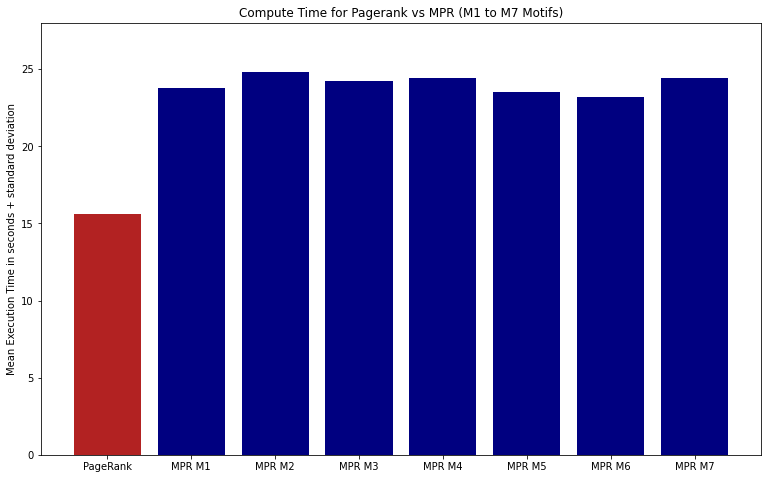

In [71]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])
labels = ['PageRank'] + ['MPR M%d'%i for i in range(1,8)]
mean_time = [15.6,23.8,24.8,24.2,24.4, 23.5, 23.2, 24.4]
std_dev_time = [1,1,1,1,1,1,1]
ax.bar(labels,mean_time, color=['firebrick', 'navy', 'navy','navy','navy','navy','navy','navy',])
# ax.errorbar(labels, mean_time, yerr=std_dev_time, marker='s', mfc='red', mec='red', ms=20, mew=4)

plt.title('Compute Time for Pagerank vs MPR (M1 to M7 Motifs)')
plt.ylabel('Mean Execution Time in seconds + standard deviation')
plt.ylim([0, 28])
plt.show()

#### Plotting results - Memory Usage

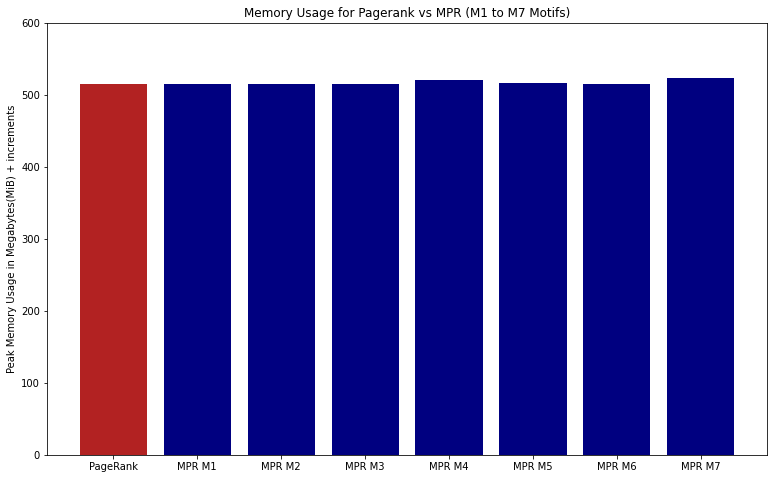

In [72]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])
peak_mem = [515.62, 515.32, 514.98, 515.59, 520.19, 515.86, 514.37, 523.21]
increment_mem = [1,1,1,1,1,1,1]
ax.bar(labels,peak_mem, color=['firebrick', 'navy', 'navy','navy','navy','navy','navy','navy',])
# ax.errorbar(labels, mean_time)

plt.title('Memory Usage for Pagerank vs MPR (M1 to M7 Motifs)')
plt.ylabel('Peak Memory Usage in Megabytes(MiB) + increments')
plt.ylim([0,600])
plt.show()

## 7.2 Evaluating Robustness

### 7.2.1 Adding extraneous nodes to the data

In [ ]:
'''Running this cell is going to create the modified data again, 
and so it is suggested to not run this cell, as the data already
exists in the data/DBLP/ directory.''' 
import random

# code adapted from __main__ code in pagerank_motif_direct to instead keep a set of all node ids in the graph
# network_file: network file path, e.g. 'data/DBLP/citation_network.txt'
def get_ids_and_copy(network_file, out_file):
    ids = set()
    f = open(network_file)
    o = open(out_file, 'w')
    edge_count = 0
    while True:
        line = f.readline()
        o.write(line)
        if line:
            edge_count += 1
            line = line.replace('\n', '')
            line = line.split(';')
            for i in range(len(line)):
                ids.add(int(line[i]))
        else:
            break
    return list(ids), edge_count
    
def append_extraneous_links(ids, edge_count, out_file, seed_val):
    n = len(ids)
    num_extra = int(0.01 * edge_count)
    id_counter = max(ids)
    out = open(out_file, 'a')
    random.seed(seed_val)
    for i in range(num_extra):
        id_counter += 1
        dst_ind = random.randint(0, n - 1) # choose a random node's index to point to
        # point new dummy citation to the random destination
        line = "%d;%d\n" % (id_counter, ids[dst_ind])
        out.write(line)
        
    
# given a network, fill a new network with extra links
def build_modified_network(network_file, out_file, seed_val):
    ids, edge_count = get_ids_and_copy(network_file, out_file)
    append_extraneous_links(ids, edge_count, out_file, seed_val)
    
if __name__ == "__main__":
    for i in range(30):
        build_modified_network('data/DBLP/citation_network.txt', "data/DBLP/citation_network_modified_%d.txt" % (i), i)

### 7.2.2 Running PageRank and MPR on the new data

> networks_list_range is a list of indices from 0 to 29 choosing which modified citation networks to use

> motif is 'M1' or ... 'M7'

> $\alpha$ in 0 to 1

> out_file will have the errors written in

In [28]:
def compare(networks_list_range, motif, alpha, out_file):
    start = time.time()
    
    f = open(out_file, 'w')
    
    network_file = 'data/DBLP/citation_network.txt'
    cite_net_edges = edge_list_from_network(network_file)
    cite_net_adjacency_matrix, cite_net_node_names = get_adjacency_matrix(cite_net_edges)
    
    PR_old = compute_pagerank(cite_net_adjacency_matrix, alpha)
    MPR_old = MPR(cite_net_adjacency_matrix, 1, motif, alpha)
    
    for i in networks_list_range:
        network_file_modified = "data/DBLP/citation_network_modified_%d.txt" % (i)
        cite_net_edges_modified = edge_list_from_network(network_file_modified)
        cite_net_adjacency_matrix_modified, cite_net_node_names_modified = get_adjacency_matrix(cite_net_edges_modified)
        
        PR_new = compute_pagerank(cite_net_adjacency_matrix_modified, alpha)
        MPR_new = MPR(cite_net_adjacency_matrix_modified, 1, motif, alpha)
    
        error_PR = np.sum(np.absolute(PR_old - PR_new[:len(PR_old)]))
        error_MPR = np.sum(np.absolute(MPR_old - MPR_new[:len(MPR_old)]))
    
        f.write("%f;%f\n" % (error_PR, error_MPR))
        print("---comparing modified network %d has taken %f seconds" %(i,(time.time() - start)))

if __name__ == '__main__':
    start = time.time()
    
    motif = 'M7'
    
    alpha = 0.1
    print("For \u03B1 = ", alpha)
    compare(range(5), motif, alpha, "output/DBLP/%s_alpha%s_errors.txt" % (motif,alpha))
    print("Comparing for \u03B1 = %f  has taken %f seconds" %(alpha,(time.time() - start)))
    
    alpha = 0.3
    print("For \u03B1 = ", alpha)
    compare(range(5, 10), motif, alpha, "output/DBLP/%s_alpha%s_errors.txt" % (motif,alpha))
    print("Comparing for \u03B1 = %f  has taken %f seconds" %(alpha,(time.time() - start)))
    
    alpha = 0.5
    print("For \u03B1 = ", alpha)
    compare(range(10,15), motif, alpha, "output/DBLP/%s_alpha%s_errors.txt" % (motif,alpha))
    print("Comparing for \u03B1 = %f  has taken %f seconds" %(alpha,(time.time() - start)))

    


For α =  0.1
---comparing modified network 0 has taken 97.861194 seconds
---comparing modified network 1 has taken 154.213963 seconds
---comparing modified network 2 has taken 211.232779 seconds
---comparing modified network 3 has taken 272.446150 seconds
---comparing modified network 4 has taken 327.504060 seconds
Comparing for α = 0.100000  has taken 327.747131 seconds
For α =  0.3
---comparing modified network 5 has taken 94.502688 seconds
---comparing modified network 6 has taken 151.825834 seconds
---comparing modified network 7 has taken 208.500685 seconds
---comparing modified network 8 has taken 264.169082 seconds
---comparing modified network 9 has taken 320.799031 seconds
Comparing for α = 0.300000  has taken 648.815226 seconds
For α =  0.5
---comparing modified network 10 has taken 96.592407 seconds
---comparing modified network 11 has taken 154.380440 seconds
---comparing modified network 12 has taken 211.893048 seconds
---comparing modified network 13 has taken 269.811929 

### 7.2.3 Plotting Errors from Evaluating Robustness

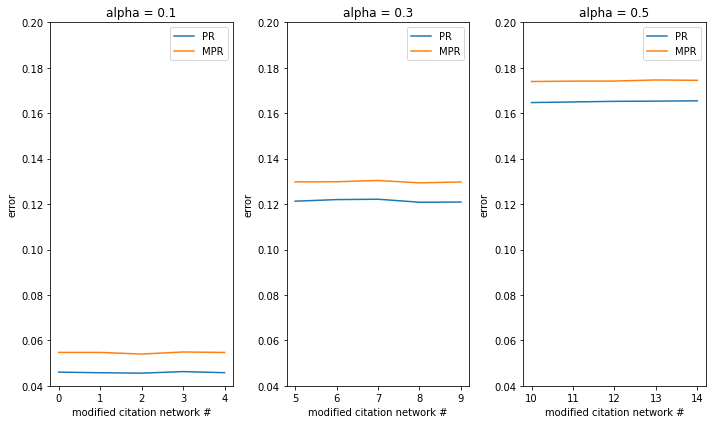

In [2]:
from matplotlib import pyplot as plt

if __name__ == '__main__':
    
    f = open("output/DBLP/M7_alpha0.1_errors.txt")
    pr_1 = []
    mpr_1 = []
    while True:
        line = f.readline()
        if line:
            line = line.strip()
            line = line.split(';')
            pr_1.append(float(line[0]))
            mpr_1.append(float(line[1]))
        else:
            break
    f.close()
        
    f = open("output/DBLP/M7_alpha0.3_errors.txt")
    pr_3 = []
    mpr_3 = []
    while True:
        line = f.readline()
        if line:
            line = line.strip()
            line = line.split(';')
            pr_3.append(float(line[0]))
            mpr_3.append(float(line[1]))
        else:
            break
    f.close()
        
    f = open("output/DBLP/M7_alpha0.5_errors.txt")
    pr_5 = []
    mpr_5 = []
    while True:
        line = f.readline()
        if line:
            line = line.strip()
            line = line.split(';')
            pr_5.append(float(line[0]))
            mpr_5.append(float(line[1]))
        else:
            break
    f.close()
    
    fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (10,6))
    
    axes[0].plot(range(5), pr_1, label = "PR")
    axes[0].plot(range(5), mpr_1, label = "MPR")
    axes[0].set_ylim(0.04, 0.2)
    axes[0].set_xlabel("modified citation network #")
    axes[0].set_ylabel("error")
    axes[0].legend()
    axes[0].set_title("alpha = 0.1")
    
    axes[1].plot(range(5,10), pr_3, label = "PR")
    axes[1].plot(range(5,10), mpr_3, label = "MPR")
    axes[1].set_ylim(0.04, 0.2)
    axes[1].set_xlabel("modified citation network #")
    axes[1].set_ylabel("error")
    axes[1].legend()
    axes[1].set_title("alpha = 0.3")
    
    axes[2].plot(range(10,15), pr_5, label = "PR")
    axes[2].plot(range(10,15), mpr_5, label = "MPR")
    axes[2].set_ylim(0.04, 0.2)
    axes[2].set_xlabel("modified citation network #")
    axes[2].set_ylabel("error")
    axes[2].legend()
    axes[2].set_title("alpha = 0.5")
    
    fig.tight_layout()
    plt.show()

## 7.3 Evaluating Performance

### 7.3.1 Normalized Discounted Cumulative Gain $nDCG$

> Adapted from <i>ndcg_DBLP.py</i> from <i>H.Zhao Et.Al</i>

In [16]:
import numpy as np
import math

def read_top(txt_name, dict, K):
    f = open(txt_name)
    count = 0
    result_array = []
    name_array = []
    while True:
        line = f.readline()
        if count >= K:
            break
        if line:
            line = line.strip()
            line = line.split(';')
            name = line[1]
            score = dict[name]
            if score < 30:
                continue
            result_array.append(score)
            name_array.append(name)
            count += 1
        else:
            break
    return result_array, name_array


def construct(txt_name):
    f = open(txt_name)
    user = {}
    count = 0
    while True:
        line = f.readline()
        if line:
            line = line.strip()
            line = line.split(';')
            name = line[0]
            score = int(line[1])
            user[name] = score
            count += 1
        else:
            break
    return user


def get_ndcg(result1, result2):
    sum1 = 0
    sum2 = 0
    for i in range(len(result1)):
        sum1 += result1[i] * 1.0 / (np.log2(i+2))
        sum2 += result2[i] * 1.0 / (np.log2(i+2))
    return sum2 * 1.0 / sum1

### 7.4.2 Compute Normalized Discounted Cumulative Gain $nDCG$

In [18]:
# generalizes __main__ code from ndcg_DBLP for our experiments
def compute_ndcg(results_file, K):
    txt_name3 = 'data/DBLP/h_index_all.txt'
    dict_author = construct(txt_name3)
    txt_name = results_file
    rank_value = K
    rank_array, name_array = read_top(txt_name, dict_author, rank_value)
    result = {}
    for i in range(len(rank_array)):
        score = dict_author[name_array[i]]
        result[name_array[i]] = score
    result_array = []
    dict = sorted(result.items(), key=lambda item: item[1], reverse=True)
    for i in range(len(dict)):
        result_array.append(dict[i][1])

    score = get_ndcg(result_array, rank_array)
    return score

if __name__ == '__main__':
    # for top 10, top 50, top 250, and top 500
    K_list = [50,100,250,500,1000]
    out = open("output/DBLP/ndcg_PR.txt", 'w')
    
    for K in K_list:
        score = compute_ndcg("output/DBLP/result_PR.txt", K)
        out.write("%d;%f\n" % (K,score))
    out.close()
    
    for i in range(1,8):
        motif = "M%d" % (i)
        out = open("output/DBLP/ndcg_%s.txt" % (motif), 'w')
        for K in K_list:
            score = compute_ndcg("output/DBLP/result_%s.txt" % (motif), K)
            out.write("%d;%f\n" % (K,score))
        out.close()


### 7.4.3 Plotting $nDCG$

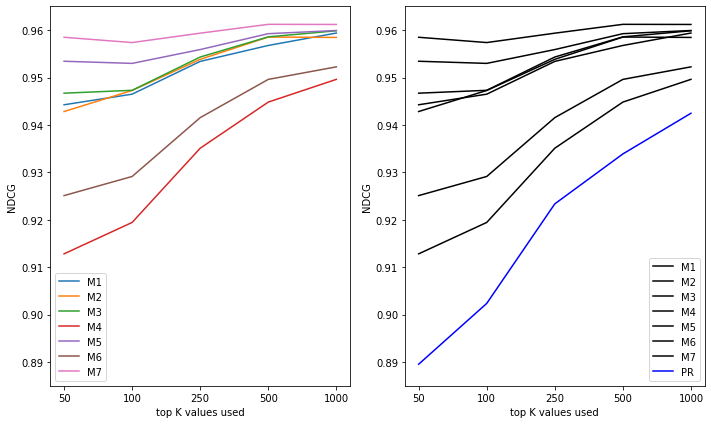

In [19]:
from matplotlib import pyplot as plt

if __name__ == '__main__':
    f = open("output/DBLP/ndcg_PR.txt")
    
    K_list = []
    ndcg_PR = []
    while True:
        line = f.readline()
        if line:
            line = line.strip()
            line = line.split(';')
            K = line[0]
            val = float(line[1])
            
            K_list.append(K)
            ndcg_PR.append(val)
        else:
            break
    f.close()
        
    ndcg_M = []
    for i in range(1,8):
        ndcg_M_i = []
        f = open("output/DBLP/ndcg_M%s.txt" %(i))
        while True:
            line = f.readline()
            if line:
                line = line.strip()
                line = line.split(';')
                K = line[0]
                val = float(line[1])
                
                ndcg_M_i.append(val)
            else:
                break
        f.close()
        ndcg_M.append(ndcg_M_i)
    
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,6))
    
    for i in range(1,8):
        axes[0].plot(K_list, ndcg_M[i-1], label = "M%s" % (i))
    
    axes[0].set_ylim(0.885, 0.965)
    axes[0].set_xlabel("top K values used")
    axes[0].set_ylabel("NDCG")
    axes[0].legend()
    
    for i in range(1,8):
        axes[1].plot(K_list, ndcg_M[i-1], label = "M%s" % (i), color = 'black')
    axes[1].plot(K_list, ndcg_PR, label = "PR", color = 'blue')
    axes[1].set_ylim(0.885, 0.965)
    axes[1].set_xlabel("top K values used")
    axes[1].set_ylabel("NDCG")
    axes[1].legend()
    
    fig.tight_layout()
    plt.show()
